<a href="https://colab.research.google.com/github/kubohenrique/churn_telecom/blob/main/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de previsão de Churn

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>


Imagine que você tem uma assinatura de um serviço de streaming de filmes e, de repente, decide cancelar essa assinatura. Este é um exemplo do que chamamos de "churn". Churn é um termo usado pelas empresas para descrever quando um cliente decide parar de usar seus produtos ou serviços.

### O que é Churn?

Churn, ou rotatividade de clientes, acontece quando clientes deixam de comprar produtos ou cancelar serviços de uma empresa. Isso pode ocorrer por diversos motivos, como insatisfação com o serviço, custos elevados, ou simplesmente porque encontraram uma alternativa melhor. O churn é uma métrica importante porque pode afetar diretamente a saúde financeira e o crescimento de uma empresa.

### Por que Churn é um Problema?

1. **Perda de Receita**:
   - Quando um cliente cancela um serviço ou para de comprar produtos, a empresa perde a receita que aquele cliente geraria. Isso é especialmente prejudicial se muitos clientes decidirem cancelar ao mesmo tempo.

2. **Custo de Aquisição de Clientes**:
   - Conseguir novos clientes geralmente é mais caro do que manter os atuais. Empresas gastam tempo e dinheiro em marketing e promoções para atrair novos clientes. Se muitos clientes saem, os esforços e investimentos em novas aquisições precisam ser ainda maiores para compensar as perdas.

3. **Reputação da Empresa**:
   - Um alto índice de churn pode indicar problemas com os produtos ou serviços da empresa. Isso pode afetar a reputação da empresa no mercado, fazendo com que novos clientes em potencial pensem duas vezes antes de comprar.

4. **Previsibilidade de Negócios**:
   - Empresas com altos índices de churn têm dificuldade em prever sua receita futura, o que pode complicar o planejamento e a tomada de decisões estratégicas.

### Como a Previsão de Churn Ajuda?

A previsão de churn, ou "churn prediction", usa técnicas de análise de dados e machine learning para identificar quais clientes estão mais propensos a cancelar seus serviços ou parar de comprar. Com essas informações, empresas podem tomar medidas proativas para reter esses clientes, como oferecer promoções especiais, melhorar o atendimento ao cliente, ou ajustar seus serviços para melhor atender às necessidades dos clientes.

### Exemplos Práticos

- **Empresas de Telecomunicações**: Utilizam a previsão de churn para identificar clientes que estão insatisfeitos com seus planos de celular e oferecer pacotes especiais para evitar que mudem para concorrentes.
- **Serviços de Assinatura**: Plataformas de streaming de música ou vídeo analisam padrões de uso para prever quando um assinante pode cancelar e enviam recomendações personalizadas ou ofertas de desconto para mantê-los engajados.
- **Instituições Financeiras**: Bancos e empresas de cartão de crédito usam churn prediction para identificar clientes que podem estar pensando em mudar para outra instituição e oferecem incentivos para manter sua fidelidade.


Entender e prever o churn é crucial para as empresas manterem seus clientes satisfeitos e garantir um crescimento sustentável. Com a ajuda de tecnologias avançadas, as empresas podem não apenas identificar potenciais problemas, mas também implementar soluções que aumentem a satisfação e a retenção dos clientes, fortalecendo sua posição no mercado.

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

### Bibliotecas

In [ ]:
# @title instalando biliotecas

### Instalando as bibliotecas
!pip install pycaret -q

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from ydata_profiling import ProfileReport
from pycaret.classification import *
from sklearn.ensemble import GradientBoostingClassifier
from joblib import dump, load

%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Importando os Dados

In [ ]:
# importar os dados
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Análise Exploratória

<center><img alt="Colaboratory logo" width="50%" src="https://img.freepik.com/free-vector/data-analysis-concept-illustration_114360-8023.jpg?t=st=1715366832~exp=1715370432~hmac=f91a16bbf53976b01dda2352653bb8532cf3aab47875c9780a2f236b10550a5d&w=1380"></center>

A análise exploratória de dados (AED) desempenha um papel fundamental em qualquer projeto de análise de dados por várias razões:

1. **Compreensão dos dados:** A AED ajuda a entender a natureza dos dados com os quais estamos lidando. Isso inclui a identificação de tipos de variáveis, distribuições, valores ausentes e possíveis outliers.

2. **Detecção de padrões:** Ao visualizar e resumir os dados de diferentes maneiras, podemos identificar padrões, tendências e relações entre variáveis. Isso nos ajuda a formular hipóteses e orientar análises mais avançadas.

3. **Validação de pressupostos:** Antes de aplicar modelos estatísticos ou algoritmos de machine learning, é importante verificar se os pressupostos subjacentes são atendidos. A AED permite testar esses pressupostos e tomar medidas corretivas, se necessário.

4. **Identificação de outliers e erros:** A AED ajuda a identificar valores atípicos e erros nos dados que podem distorcer as análises posteriores. Isso é crucial para garantir a qualidade dos resultados finais.

5. **Seleção de variáveis:** Ao explorar os dados, podemos identificar quais variáveis são mais relevantes para nossos objetivos de análise. Isso nos permite focar em aspectos importantes e descartar informações irrelevantes.

6. **Comunicação de resultados:** Gráficos e resumos estatísticos gerados durante a AED são úteis para comunicar insights e resultados de forma clara e acessível a diferentes partes interessadas.

Em resumo, a análise exploratória de dados é uma etapa essencial em qualquer projeto de análise de dados, pois nos ajuda a compreender, validar e extrair informações valiosas dos dados, orientando análises mais avançadas e a tomada de decisões fundamentadas.


#### Verificando o tamanho do dataset:

In [ ]:
print(f'Entradas:\t{df.shape[0]}')
print(f'Variáveis:\t{df.shape[1]}')

Entradas:	7043
Variáveis:	21


#### Ver as 5 primeiras entradas

A função df.head() é frequentemente uma das primeiras etapas na análise de dados porque fornece uma visão rápida e sucinta dos dados no início do conjunto de dados. O df.head() é uma ferramenta útil para iniciar a análise de dados, fornecendo uma visão geral inicial dos dados e ajudando a identificar problemas potenciais antes de prosseguir com análises mais avançadas.
Então vamos ver quais são as 5 primeiras e ultimas linhas desses dados:

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


#### Verificar se há valores ausentes

Identificar a presença de valores ausentes em cada coluna é uma etapa essencial na análise de dados, pois fornece insights importantes sobre a qualidade dos dados, impacto nas análises e orienta o tratamento adequado dos dados ausentes.

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Tipos de Dados

Vamos verificar os tipos de dados encontrados nesse dataset com o método `.dtype`, o método `.dtypes` é crucial para entender os tipos de dados em cada coluna do DataFrame, orientando a seleção de métodos apropriados, identificação de problemas nos dados, planejamento da limpeza e comunicação de resultados.

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

* Com essa análise primária, já percebemos que a variável `TotalCharges` está como se fosse do tipo String, mas ele é para ser do tipo *float*, vamos arrumar isso.

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

A função `pd.to_numeric` é usada para converter uma coluna (ou série) de dados para um tipo numérico, o parâmetro errors='coerce' no método pd.to_numeric da biblioteca Pandas é usado para lidar com erros durante a conversão de dados para um tipo numérico.

In [ ]:
df.TotalCharges.isnull().sum()

11

In [ ]:
(df.TotalCharges.isnull().sum()/df.shape[0]) * 100

0.1561834445548772

Percebe-se que com essa mudança, surgiu alguns dados nulos, elas são pequenas mas é bom tratarmos isso, por isso irei substituir os dados faltantes pela mediana da coluna:

In [ ]:
# Calcular a mediana da coluna 'TotalCharges', ignorando os valores nulos
median_value = df['TotalCharges'].median()
print("\nMediana da coluna 'TotalCharges':\t", median_value)

# Substituir os valores nulos pela mediana
df['TotalCharges'].fillna(median_value, inplace=True)
print('Número de dados faltantes :\t{}'.format(df.TotalCharges.isnull().sum()))


Mediana da coluna 'TotalCharges':	 1397.475
Número de dados faltantes :	0


Com isso eliminamos os dados faltantes, e agora eliminarei a coluna CustomerID, pois ela não interfere em nada na análise:

In [ ]:
#df = df.drop('customerID', axis=1,inplace=True)

### Hipóteses:

Levantar hipóteses na análise de dados é fundamental por várias razões:

1. **Direcionamento da Análise**: As hipóteses orientam a análise, fornecendo um foco para investigar os dados. Isso evita a análise indiscriminada e ajuda a concentrar esforços nas questões mais relevantes.

2. **Validação e Refutação**: Hipóteses são declarações testáveis sobre relações entre variáveis. Ao testar essas hipóteses, você pode validar aquelas que estão corretas e refutar as que estão erradas. Isso ajuda a garantir a precisão e confiabilidade dos resultados.

3. **Economia de Recursos**: Ao definir hipóteses específicas, você evita análises desnecessárias e economiza tempo e recursos, focando apenas nas questões mais importantes e relevantes para seus objetivos.

4. **Interpretação dos Resultados**: Hipóteses fornecem um contexto para interpretar os resultados da análise de dados. Eles ajudam a entender o significado das descobertas e a extrair insights úteis para tomada de decisão.

5. **Gerar Novas Perguntas**: Mesmo que uma hipótese seja refutada, o processo de levantá-la pode levar a novas perguntas e descobertas. Isso estimula a investigação contínua e a expansão do conhecimento.

Em resumo, levantar hipóteses na análise de dados é essencial para orientar a investigação, validar resultados, economizar recursos, interpretar descobertas e estimular a geração de novas perguntas e conhecimentos.

#### H1 - Certas faixas etárias ou gêneros têm maior probabilidade de churn. (V)

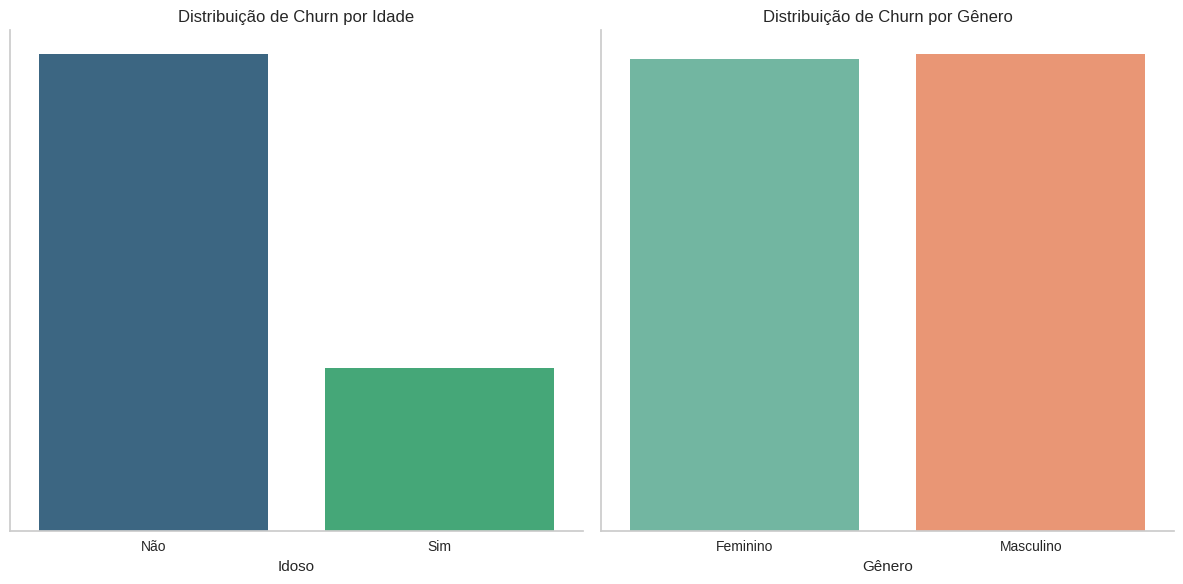

In [ ]:
# Filtrar os dados para incluir apenas clientes que churnaram
df_churned = df[df['Churn'] == 'Yes']

# Plotar a distribuição de churn por idade e gênero
plt.figure(figsize=(12, 6))

# Distribuição de churn por idade
plt.subplot(1, 2, 1)
sns.countplot(data=df_churned, x='SeniorCitizen', hue='SeniorCitizen', palette='viridis')
plt.title('Distribuição de Churn por Idade')
plt.legend([], loc='upper left')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.xlabel('Idoso')
plt.ylabel('')  # Rótulo do eixo y
plt.yticks([])  # Remove os ticks do eixo y
plt.gca().spines['top'].set_visible(False)  # Remove a borda superior
plt.gca().spines['right'].set_visible(False)  # Remove a borda direita

# Distribuição de churn por gênero
plt.subplot(1, 2, 2)
sns.countplot(data=df_churned, x='gender', hue='gender', palette='Set2')
plt.title('Distribuição de Churn por Gênero')
plt.xticks([0, 1], ['Feminino', 'Masculino'])
plt.xlabel('Gênero')
plt.ylabel('')  # Rótulo do eixo y
plt.yticks([])  # Remove os ticks do eixo y
plt.gca().spines['top'].set_visible(False)  # Remove a borda superior
plt.gca().spines['right'].set_visible(False)  # Remove a borda direita

plt.tight_layout()
plt.show()


* Não se pode tirar uma conclusão de que homens ou mulheres tendem a ter mais churn que o outro, pela distribuição, estão praticamente iguais

* Já quem é de terceira idade, tende a não churnar como uma pessoa que não está nessa categoria.

#### H2 - Clientes com um curto tenure têm maior probabilidade de churn. (**V**)



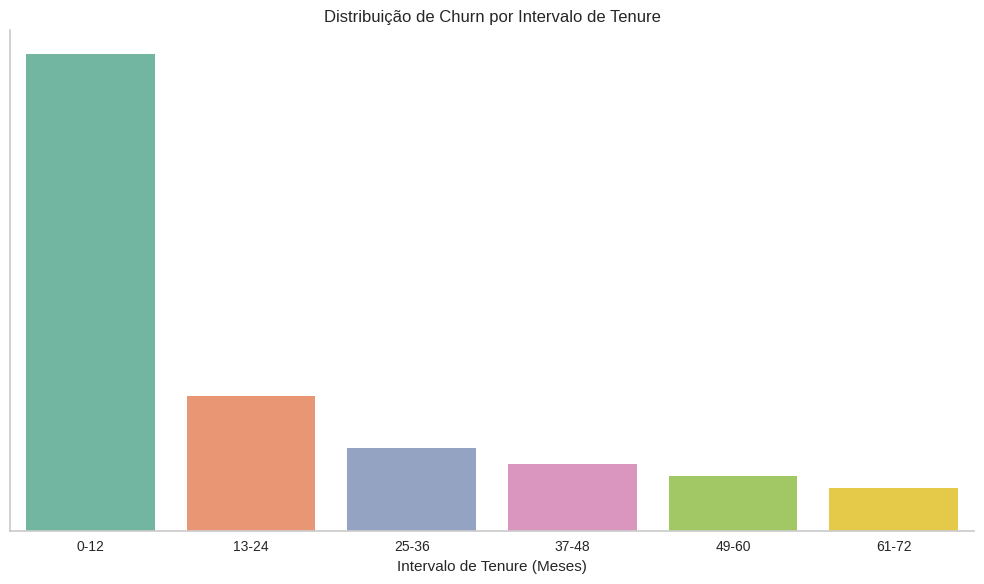

In [ ]:
# Definir os intervalos de tenure
tenure_bins = [0, 12, 24, 36, 48, 60, 72]  # Intervalos de 12 meses (1 ano)

# Adicionar uma nova coluna ao DataFrame com o intervalo de tenure
df['tenure_interval'] = pd.cut(df['tenure'], bins=tenure_bins, labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])

# Filtrar os dados para incluir apenas clientes que churnaram
df_churned = df[df['Churn'] == 'Yes']

# Plotar a distribuição de churn por intervalo de tenure
plt.figure(figsize=(10, 6))
sns.countplot(data=df_churned, x='tenure_interval', hue = 'tenure_interval', palette='Set2')
plt.title('Distribuição de Churn por Intervalo de Tenure')
plt.xlabel('Intervalo de Tenure (Meses)')
plt.ylabel('')  # Rótulo do eixo y
plt.yticks([])  # Remove os ticks do eixo y
plt.gca().spines['top'].set_visible(False)  # Remove a borda superior
plt.gca().spines['right'].set_visible(False)  # Remove a borda direita
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

* Clientes que tiveram Churn, são em maioria pessoas com contrato de até 12 meses, depois cai de forma significativa o número de Churn. A sugestão é focar nesses primeiros 12 meses para manter o cliente.

#### H3 - Clientes com contratos mensais têm maior probabilidade de churn do que aqueles com contratos anuais. (V)

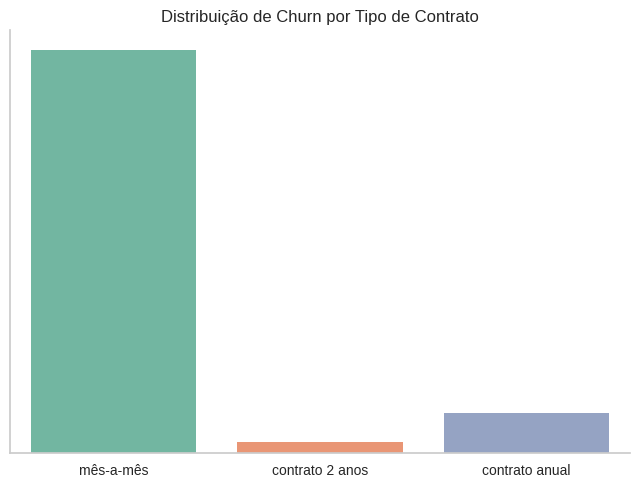

In [ ]:
sns.countplot(data=df_churned, x='Contract', hue='Contract', palette='Set2')
plt.title('Distribuição de Churn por Tipo de Contrato')
plt.xticks([0, 1, 2], ['mês-a-mês', 'contrato 2 anos', 'contrato anual'])
plt.xlabel('')
plt.ylabel('')  # Rótulo do eixo y
plt.yticks([])  # Remove os ticks do eixo y
plt.gca().spines['top'].set_visible(False)  # Remove a borda superior
plt.gca().spines['right'].set_visible(False)  # Remove a borda direita

* Realmemte clientes com contratos do tipo mês a mês tendem a ter uma taxa de Churn maior, portanto os esforços devem estar concentrados neles.

#### H4 - Certos métodos de pagamento estão associados a maiores taxas de churn (V)

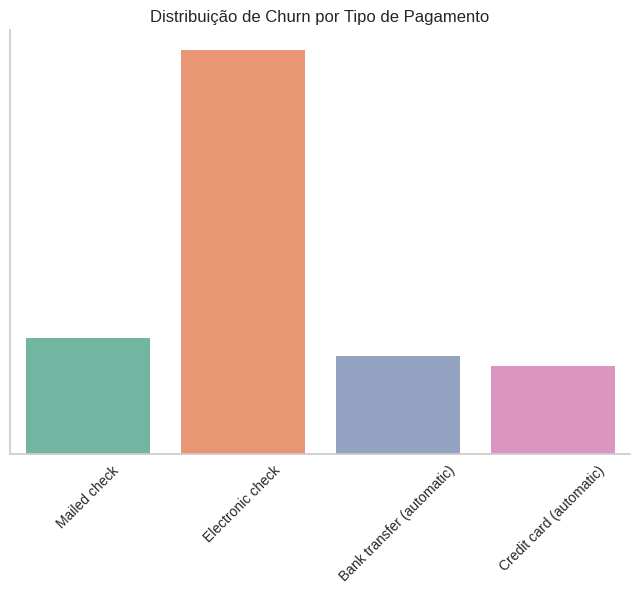

In [ ]:
sns.countplot(data=df_churned, x='PaymentMethod', hue='PaymentMethod', palette='Set2')
plt.title('Distribuição de Churn por Tipo de Pagamento')
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('')  # Rótulo do eixo y
plt.yticks([])  # Remove os ticks do eixo y
plt.gca().spines['top'].set_visible(False)  # Remove a borda superior
plt.gca().spines['right'].set_visible(False)  # Remove a borda direita

* De forma geral, o churn por tipo de pagamento é equilibrado, com exceção para o tipo de pagemnto *Electronic check*, é um potencial tipo para ficar de olho.

#### H5 - Clientes com cobranças mensais mais altas ou totais mais altos têm maior probabilidade de churn

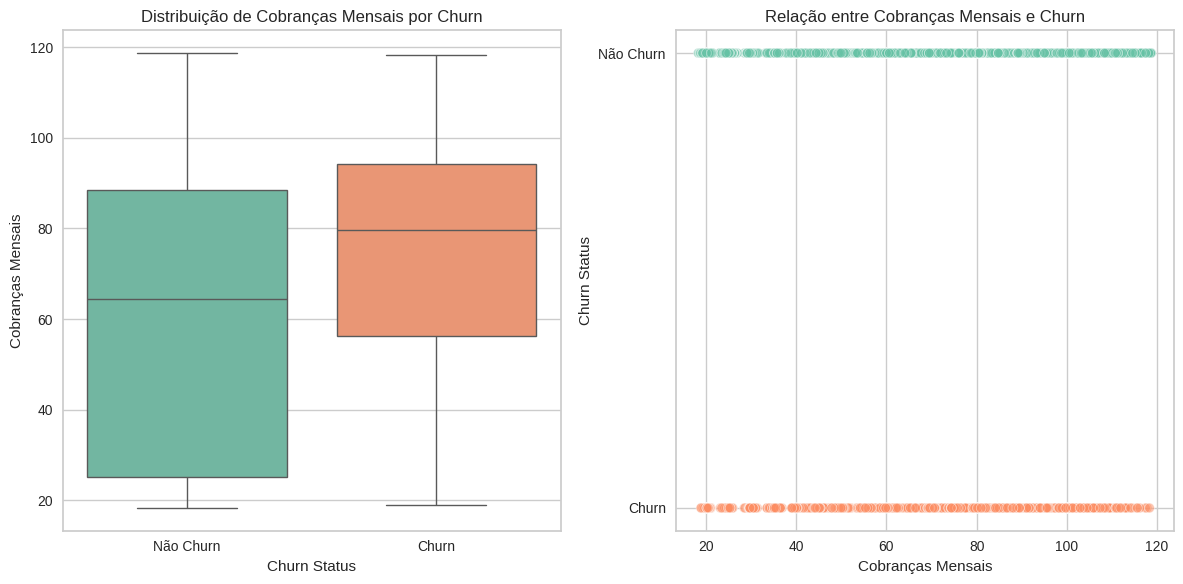

In [ ]:
# Plotar um boxplot para visualizar a distribuição das cobranças mensais por churn

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='MonthlyCharges', hue='Churn',data=df, palette='Set2')
plt.title('Distribuição de Cobranças Mensais por Churn')
plt.xlabel('Churn Status')
plt.ylabel('Cobranças Mensais')
plt.xticks([0, 1], ['Não Churn', 'Churn'])

# Plotar um gráfico de dispersão para ver a relação entre cobranças mensais e churn

plt.subplot(1, 2, 2)
sns.scatterplot(x='MonthlyCharges', y='Churn', data=df, hue='Churn', palette='Set2', alpha=0.5)
plt.title('Relação entre Cobranças Mensais e Churn')
plt.xlabel('Cobranças Mensais')
plt.ylabel('Churn Status')
plt.yticks([0, 1], ['Não Churn', 'Churn'])
plt.legend('')


plt.tight_layout()
plt.show()

- No primeiro gráfico (boxplot), cada boxplot mostra a distribuição das cobranças mensais para clientes que churnaram (Churn=1) e aqueles que não churnaram (Churn=0). Isso permite visualizar como os valores das cobranças diferem entre os dois grupos.

- No segundo gráfico (gráfico de dispersão), cada ponto representa um cliente, onde o eixo x representa as cobranças mensais e o eixo y representa o churn status (0 para não churn e 1 para churn). Isso nos permite ver se há alguma tendência ou padrão na relação entre cobranças mensais e churn.

### Transformando a variável Alvo

A variável Alvo, está como `No` e `Yes`, irei tranmsformar eles em uma variável numéria [0, 1] para facilitar na etapa seguinte que é de criar o modelo de aprendizado de máquina.

In [ ]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_interval
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-12


#### Verificar se os dados estão balanceados

Contagem de Classes:
Churn
0    5174
1    1869
Name: count, dtype: int64

Proporção de Classes:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


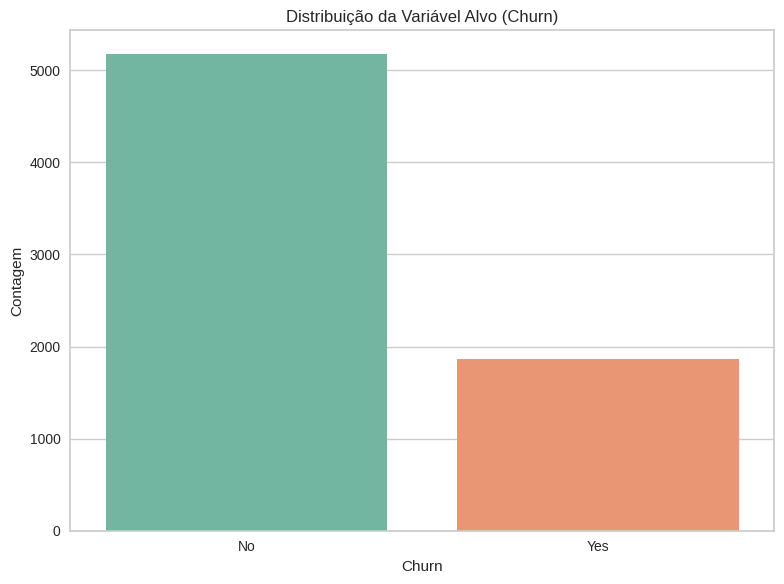

In [ ]:
# Contar a frequência das classes
class_counts = df['Churn'].value_counts()
print("Contagem de Classes:")
print(class_counts)

# Calcular a proporção das classes
class_proportions = df['Churn'].value_counts(normalize=True)
print("\nProporção de Classes:")
print(class_proportions)

# Visualizar a distribuição das classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, hue='Churn', palette='Set2')
plt.title('Distribuição da Variável Alvo (Churn)')
plt.legend([], loc='upper left')
plt.xlabel('Churn')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()


* Existem mais casos de não Churn do que com Churn, portanto na próxima etapa , a de criação de modelo de ML irei normalizar os dados.

#### Eliminando a Coluna 'Customer ID'

* A coluna `costumerID` não agrega nenhuma informação, pois se trata de um

In [ ]:
# remover coluna costumerID
df.drop("customerID", axis=1, inplace=True)

## PyCaret e AutoML

Um projeto de Machine Learning é algo que carrega elevado nível de complexidade, e demanda muita concentração, atenção aos detalhes e principalmente, tempo. Precisamos saber muito bem como tratar nossos dados, escolher e treinar modelos, avaliar resultados, e tudo isso consome muito tempo, e acaba abrindo margem para erros.

Com isso em mente, utilizaremos aqui o framework de Auto Machine Learning **PyCaret**.

<p align="center"><img src="https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png" width="60%"></p>

PyCaret é uma biblioteca *open-source* e *low-code* de Python que tem como objetivo reduzir o templo entre o ciclo entre uma hipótese e insights em experimentos com Machine Learning.

O PyCaret possibilita que Cientistas de Dados completem experimentos de ponta a ponta de forma rápida e eficiente. Em comparação com outras bibliotecas do tipo, o PyCaret traz o diferencial de ser *low-code*, isto é, demanda pouco código para que opere de forma robusta. Todas as operações realizadas com o PyCaret estão carregadas em um pipeline que está pronto para o deploy. Basicamente, o PyCaret é um pacote low-code que engloba diversas bibliotecas e frameworks de Machine Learning como scikit-learn, XGBoost, Microsoft LightGBM, spaCy e muito mais.

### Vazamento de dados
Vazamento de dados (Data Leakage) em projetos de aprendizado de máquina ocorre quando informações fora do conjunto de dados de treinamento são indevidamente incluídas no treinamento do modelo. Isso é problemático porque o modelo aprende padrões que não estarão disponíveis em situações reais, resultando em um desempenho irrealisticamente alto durante a validação e testes, mas falhando ao ser aplicado em novos dados.

Essa falha na generalização é uma das principais razões pelas quais o vazamento de dados é ruim. Modelos treinados com dados vazados tendem a ter uma falsa confiança em seu desempenho, levando a decisões erradas e potenciais prejuízos quando implantados em ambientes reais. Isso pode ocorrer, por exemplo, quando variáveis futuras são usadas no treinamento ou quando o pré-processamento é feito antes da divisão dos dados em conjuntos de treinamento e teste.

* Para prevenir vazamentos, é crucial dividir os dados antes de qualquer processamento, nesse caso separarei 10% dos dados para preservar. Assim, evitamos vazamentos de dados para desenvolver modelos que sejam verdadeiramente úteis e precisos em cenários do mundo real.

In [ ]:
# separando os dados em teste e treino
test = df.sample(frac=0.10)
train = df.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

### Fazendo o Setup

A função `setup()` inicializa o ambiente no PyCaret e cria o pipeline de transformação para preparar os dados para modelagem e deploy.


Após a importação, a função `setup()` deve ser chamada antes de qualquer outra função do PyCaret ser executada. Ela recebe dois parâmetros obrigatórios: Um dataframe do pandas e o nome da coluna alvo. Todos os outros parâmetros são opcionais, e são usados para customizar o pipeline de pré-processamento.

Ao executar o `setup()`, o PyCaret vai inferir automaticamente o tipo de cada variável baseado em algumas propriedades. Normalmente, a inferência é feita corretamente mas não é o caso todas as vezes. Por isso, o PyCaret oferece uma tabela mostrando as features e seus tipos inferidos, após a execução do `setup()`. Caso todos os tipos estejam corretos, podemos seguir em frente apertando a tecla enter. Caso contrário, deve-se digitar `quit` no espaço disponibilizado.

Garantir que os tipos de dados estejam corretos é fundamental para o PyCaret, pois ele executa automaticamente alguns pré-processamentos que são necessários para problemas de Machine Learning. Essas técnicas são executadas diferentemente para cada tipo de dados, por isso é essencial que sejam corretamente configurados.

* Para problemas de detecção de Churn, usarei um modelo de classificação,  pois a detecção de Churn é naturalmente adequada para modelos de classificação devido à sua capacidade de lidar com decisões binárias, identificar padrões complexos, usar métricas de avaliação apropriadas, oferecer flexibilidade na modelagem, ser implementada eficientemente em escala e fornecer interpretabilidade quando necessário.

* Durante a configuração, foi especificado o parâmetro `fix_imbalance=True` para tratar o desbalanceamento dos dados automaticamente.

In [ ]:
clf1 = setup(data=train, target='Churn', fix_imbalance=True, session_id=123)

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(6339, 21)"
4,Transformed data shape,"(8416, 47)"
5,Transformed train set shape,"(6514, 47)"
6,Transformed test set shape,"(1902, 47)"
7,Numeric features,4
8,Categorical features,16
9,Rows with missing values,0.1%


### Treinar e comparar modelos

O PyCaret facilita a comparação de diferentes modelos. Vamos usar a função `compare_models()` para identificar os melhores modelos para nosso conjunto de dados.

Com os resultados, precisamos escolher uma métrica para podermos eleger o melhor modelo para esse problema.

**Métricas usadas para avaliar modelos de classificação:**

### 1. Acurácia (Accuracy)
- **Definição**: A acurácia é a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões.
- **Interpretação**: É uma métrica básica que indica a precisão geral do modelo. No entanto, pode ser enganosa em conjuntos de dados desbalanceados, onde uma classe é muito mais comum do que a outra.

### 2. Área Sob a Curva ROC (ROC AUC)
- **Definição**: A Área Sob a Curva (ROC AUC) é uma medida da capacidade discriminativa do modelo. É calculada como a área sob a curva ROC (Receiver Operating Characteristic), que é um gráfico da taxa de verdadeiros positivos (TPR) em relação à taxa de falsos positivos (FPR) em vários limiares de classificação.
- **Interpretação**: Quanto maior a área sob a curva ROC, melhor o desempenho do modelo em discriminar entre as classes. Um valor de 0,5 indica um modelo que faz previsões aleatórias, enquanto um valor de 1 indica um modelo perfeito.

### 3. Revocação (Recall ou Sensibilidade)
- **Definição**: A revocação é a proporção de verdadeiros positivos (TP) em relação ao total de instâncias positivas no conjunto de dados.
- **Interpretação**: É uma métrica útil quando o custo de um falso negativo é alto. Por exemplo, na detecção de fraudes, é importante detectar o máximo possível de transações fraudulentas, mesmo que isso signifique ter alguns falsos positivos.

### 4. Precisão (Precision)
- **Definição**: A precisão é a proporção de verdadeiros positivos (TP) em relação ao total de previsões positivas feitas pelo modelo.
- **Interpretação**: É uma métrica útil quando o custo de um falso positivo é alto. Por exemplo, na detecção de spam, é importante garantir que a maioria dos e-mails classificados como spam seja realmente spam.

### 5. F1-Score
- **Definição**: O F1-Score é a média harmônica entre precisão e revocação. É calculado como 2 * (precisão * revocação) / (precisão + revocação).
- **Interpretação**: O F1-Score fornece um equilíbrio entre precisão e revocação. É útil quando queremos uma métrica que leve em consideração tanto falsos positivos quanto falsos negativos.

### 6. Kappa e MCC (Matthews Correlation Coefficient)
- **Definição**: Kappa e MCC são métricas que medem a concordância entre as previsões do modelo e as verdadeiras classes.
- **Interpretação**: Eles levam em consideração o desempenho do modelo além do que seria esperado ao acaso. Valores próximos de 1 indicam um bom desempenho do modelo, enquanto valores próximos de 0 indicam desempenho ao acaso.

Essas são algumas das principais métricas usadas para avaliar modelos de classificação. É importante considerar o contexto específico do problema ao escolher as métricas apropriadas e interpretar seus resultados.

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7859,0.8444,0.5797,0.6029,0.5905,0.4458,0.4463,2.3220
ada,Ada Boost Classifier,0.7857,0.8426,0.6246,0.5927,0.6078,0.4606,0.4612,1.1140
lightgbm,Light Gradient Boosting Machine,0.7818,0.8280,0.5288,0.6026,0.5631,0.4186,0.4203,2.3870
rf,Random Forest Classifier,0.7814,0.8179,0.5008,0.6103,0.5492,0.4069,0.4110,1.5400
xgboost,Extreme Gradient Boosting,0.7746,0.8157,0.5229,0.5874,0.5526,0.4028,0.4044,1.2000
et,Extra Trees Classifier,0.7737,0.7960,0.4966,0.5907,0.5388,0.3905,0.3936,1.1200
ridge,Ridge Classifier,0.7474,0.8442,0.7958,0.5176,0.6266,0.4488,0.4730,0.3530
lda,Linear Discriminant Analysis,0.7460,0.8442,0.7932,0.5160,0.6246,0.4458,0.4699,0.6460
lr,Logistic Regression,0.7426,0.8441,0.7915,0.5117,0.6209,0.4398,0.4644,2.0310
dummy,Dummy Classifier,0.7341,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3380


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Instanciando o Modelo

Apesar do `compare_models()` ser uma função poderosa, e normalmente um excelente ponto de partida, ela não retorna modelos treinados. O *workflow* recomendado pelo PyCaret é usar o compare_models logo após o setup para avaliar os modelos que performam melhor com o conjunto de dados e selecionar alguns candidatos para seguir experimentando.

Dessa forma, a função permite que você crie modelos a partir da função `create_model()`. Essa função cria o modelo e o avalia usando uma *stratified cross validation*. Assim como o compare_models, o output é uma tabela de pontuação que mostra Accuracy, AUC, Recall, Precision, F1, Kappa e MCC por fold.

Para predição de Churn, o mais eficiente seria olhar o Recall, pois queremos ter certeza de que os churns previstos realemnte eram verdadeiros, e o F-1 score também.

Nesse caso analisarei 2 modelos que foram melhores que foi : Regressão logistica e o Naive Bayes.


#### Gradient Boosting Classifier e Naive Bayes

#### Gradient Boosting Classifier

**O que é?**
- O Gradient Boosting Classifier é um modelo de aprendizado de máquina que cria uma série de pequenas árvores de decisão, onde cada árvore tenta corrigir os erros das árvores anteriores.
- É uma técnica poderosa e popular usada para tarefas de classificação e regressão.

**Como funciona?**
- Imagine que você quer prever se um cliente vai cancelar sua assinatura (churn) ou não, baseado em alguns dados como idade, gastos mensais, etc.
- O modelo começa com uma árvore de decisão simples que faz algumas previsões. Em seguida, ele cria outra árvore que corrige os erros da primeira.
- Esse processo é repetido muitas vezes, e as previsões de todas as árvores são combinadas para fazer a previsão final.

**Por que é útil?**
- O Gradient Boosting é muito eficaz em melhorar a precisão das previsões, especialmente para conjuntos de dados complexos.
- É flexível e pode ser ajustado (tuned) para melhorar ainda mais o desempenho.

#### Naive Bayes

**O que é?**
- Naive Bayes é um modelo de classificação baseado no Teorema de Bayes, que calcula a probabilidade de um evento com base em informações anteriores.
- É chamado de "naive" (ingênuo) porque assume que todas as características (variáveis) são independentes umas das outras, o que nem sempre é verdade.

**Como funciona?**
- Imagine que você está tentando prever se um e-mail é spam ou não.
- Naive Bayes calcula a probabilidade de um e-mail ser spam, dado a presença de certas palavras (por exemplo, "promoção", "grátis").
- Ele combina essas probabilidades para decidir se o e-mail é spam ou não.

**Por que é útil?**
- Funciona bem mesmo com um pequeno conjunto de dados.
- É muito rápido para treinar e fazer previsões.
- Apesar da suposição de independência, funciona surpreendentemente bem em muitos problemas práticos, como a filtragem de spam.

### Comparação Simplificada

- **Facilidade de Uso**: Ambos são relativamente fáceis de implementar e usar.
- **Interpretação**: Naive Bayes é mais fácil de interpretar porque se baseia em probabilidades simples, enquanto o Gradient Boosting pode ser mais complexo devido às muitas árvores envolvidas.
- **Velocidade**: Naive Bayes é extremamente rápido tanto para treinamento quanto para previsões. O Gradient Boosting é mais lento devido à construção de muitas árvores.
- **Performance**: O Gradient Boosting geralmente oferece maior precisão e melhor desempenho em dados complexos. Naive Bayes pode ser menos preciso se as características não forem realmente independentes.

### Exemplo Prático

Imagine que uma empresa quer prever se seus clientes vão cancelar a assinatura (churn) ou não.

- **Gradient Boosting Classifier**: A empresa usa dados como idade do cliente, gastos mensais e tipo de serviço. O modelo cria várias árvores de decisão, cada uma melhorando a previsão das anteriores, para calcular a probabilidade de churn. Ele combina as previsões de todas as árvores para fazer uma previsão final.
  
- **Naive Bayes**: A empresa analisa palavras usadas nas interações dos clientes (e-mails, chamadas de suporte). Baseado na presença de certas palavras, ele calcula a probabilidade de churn. Se a probabilidade calculada for alta, eles prevêem que o cliente vai cancelar.

### Resumo

- **Gradient Boosting Classifier**: Eficaz e preciso, mas mais complexo e mais lento. Bom para dados complexos e grandes.
- **Naive Bayes**: Simples, rápido e eficaz para problemas onde as características são independentes ou quase independentes.

Ambos os métodos têm seus méritos e são escolhidos com base na natureza dos dados e nas necessidades específicas da aplicação.

In [ ]:
# criar modelo GBC
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7635,0.8223,0.5932,0.5512,0.5714,0.4084,0.4090
1,0.7860,0.8358,0.5847,0.6000,0.5923,0.4473,0.4473
2,0.7883,0.8664,0.6017,0.6017,0.6017,0.4575,0.4575
3,0.7838,0.8280,0.6017,0.5917,0.5966,0.4490,0.4490
4,0.7883,0.8421,0.5763,0.6071,0.5913,0.4486,0.4489
5,0.7635,0.8263,0.5424,0.5565,0.5494,0.3891,0.3891
6,0.7703,0.8348,0.5508,0.5702,0.5603,0.4049,0.4050
7,0.8194,0.8755,0.6186,0.6759,0.6460,0.5251,0.5261
8,0.8126,0.8634,0.5763,0.6733,0.6210,0.4976,0.5002


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# criar modelo Naive-Bayes
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6644,0.7959,0.8390,0.4323,0.5706,0.3386,0.3891
1,0.6892,0.7965,0.7797,0.4510,0.5714,0.3538,0.3866
2,0.7207,0.8418,0.8559,0.4856,0.6196,0.4244,0.4672
3,0.6779,0.8083,0.8305,0.4434,0.5782,0.3545,0.4004
4,0.6757,0.7961,0.8390,0.4420,0.5789,0.3541,0.4025
5,0.7140,0.8118,0.8644,0.4789,0.6163,0.4169,0.4633
6,0.7320,0.8381,0.8305,0.4975,0.6222,0.4341,0.4684
7,0.7201,0.8524,0.8475,0.4854,0.6173,0.4213,0.4620
8,0.7111,0.8186,0.8305,0.4757,0.6049,0.4026,0.4415


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tuning do Modelo

O **tuning** de hiperparâmetros é uma etapa crítica no desenvolvimento de modelos de machine learning. Consiste em ajustar os parâmetros do modelo para otimizar seu desempenho. Aqui estão os principais motivos pelos quais o tuning é tão importante:

### 1. Melhoria de Desempenho
- **Precisão Aumentada**: Parâmetros bem ajustados podem melhorar significativamente a precisão do modelo, tornando-o mais eficaz na tarefa de classificação ou regressão.
- **Generalização**: Um bom ajuste de parâmetros pode ajudar o modelo a generalizar melhor para novos dados, evitando overfitting (quando o modelo se ajusta demais aos dados de treinamento) e underfitting (quando o modelo é muito simples para capturar a complexidade dos dados).

### 2. Redução de Overfitting e Underfitting
- **Equilíbrio**: Tuning ajuda a encontrar um equilíbrio entre a complexidade do modelo e a quantidade de dados disponíveis, reduzindo a probabilidade de overfitting e underfitting.

### 3. Eficiência Computacional
- **Tempo de Treinamento**: Parâmetros bem ajustados podem resultar em modelos que treinam mais rapidamente e são mais eficientes em termos de uso de recursos computacionais.
- **Predição Rápida**: Modelos otimizados podem realizar previsões mais rapidamente, o que é crucial para aplicações em tempo real.

### 4. Melhoria na Interpretação
- **Simplicidade do Modelo**: Ajustar hiperparâmetros pode resultar em modelos mais simples e interpretáveis, o que é importante em muitas aplicações práticas.

### 5. Aplicação Prática
- **Desempenho em Produção**: Modelos bem ajustados têm um desempenho mais consistente e confiável em ambientes de produção, onde os dados podem variar em relação aos dados de treinamento.

Quando um modelo é criado usando o create_model() ele usa os hiperparâmetros padrão para cada modelo. Para fazer o tuning desses parâmetros, usamos a função `tune_model()`.

Essa função faz o tuning dos parâmetros automaticamente, e mais uma vez o avalia com validação cruzada. O output é uma tabela de scores para Accuracy, AUC, Recall, Precision, F1, Kappa e MCC por fold.

In [ ]:
# tunando modelo Logistic Regression
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7658,0.8165,0.6356,0.5515,0.5906,0.4277,0.4298
1,0.7770,0.8389,0.6102,0.5760,0.5926,0.4393,0.4396
2,0.7770,0.8594,0.6102,0.5760,0.5926,0.4393,0.4396
3,0.7748,0.8241,0.6780,0.5634,0.6154,0.4581,0.4620
4,0.8018,0.8434,0.6525,0.6210,0.6364,0.5003,0.5005
5,0.7590,0.8260,0.5678,0.5447,0.5560,0.3907,0.3909
6,0.7725,0.8309,0.5678,0.5726,0.5702,0.4155,0.4156
7,0.8330,0.8713,0.7034,0.6803,0.6917,0.5772,0.5773
8,0.8126,0.8608,0.6441,0.6496,0.6468,0.5193,0.5193


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# tunando modelo Naive-Bayes
tuned_nb = tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6599,0.7959,0.8390,0.4286,0.5673,0.3325,0.3838
1,0.6824,0.7967,0.7881,0.4450,0.5688,0.3469,0.3826
2,0.7140,0.8416,0.8559,0.4787,0.6140,0.4143,0.4587
3,0.6734,0.8080,0.8390,0.4400,0.5773,0.3510,0.3998
4,0.6734,0.7962,0.8475,0.4405,0.5797,0.3537,0.4046
5,0.7117,0.8124,0.8644,0.4766,0.6145,0.4135,0.4605
6,0.7297,0.8379,0.8305,0.4949,0.6203,0.4306,0.4655
7,0.7088,0.8523,0.8475,0.4739,0.6079,0.4044,0.4478
8,0.7065,0.8188,0.8305,0.4712,0.6012,0.3959,0.4358


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Plotando Modelos

Antes de finalizar e salvar o modelo, nós podemos usar a função `plot_model()` para plotar visualizações sobre a performance do nosso modelo

Essa função recebe o modelo treinado como input e retorna um plot baseado no desempenho com o pedaço do conjunto de dados separado para teste.

O PyCaret fornece várias funções de visualização que facilitam a análise e interpretação dos resultados dos modelos.

Usando o PyCaret, você pode facilmente treinar modelos, compará-los e visualizar uma variedade de gráficos para entender o desempenho e as características dos seus modelos de detecção de fraude. As funções de visualização fornecidas pelo PyCaret são intuitivas e ajudam a identificar pontos fortes e fracos dos modelos treinados.

#### Funções de Visualização

1. **Confusion Matrix**:
   - Mostra a matriz de confusão para avaliar a precisão do modelo.

2. **ROC Curve**:
   - Plota a curva ROC para visualizar a performance do modelo em termos de taxa de verdadeiros positivos versus taxa de falsos positivos.

3. **Precision-Recall Curve**:
   - Plota a curva de precisão-revocação, que é útil em conjuntos de dados desbalanceados.

4. **Feature Importance**:
   - Plota a importância das features para entender quais variáveis são mais influentes no modelo.

5. **Learning Curve**:
   - Plota a curva de aprendizado para visualizar o desempenho do modelo em relação ao tamanho do conjunto de dados.

6. **Calibration Curve**:
   - Plota a curva de calibração para avaliar a precisão das probabilidades preditas pelo modelo.

7. **Validation Curve**:
   - Plota a curva de validação para entender como a mudança de hiperparâmetros afeta o desempenho do modelo.


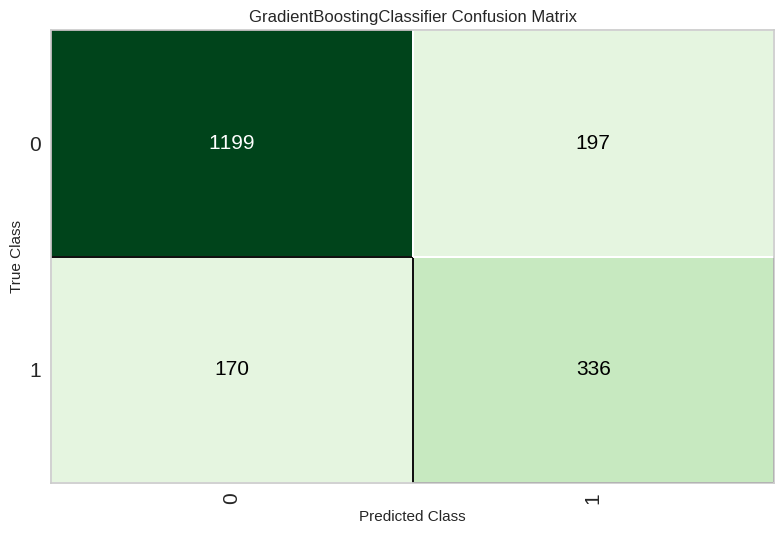

In [ ]:
# Plotar a matriz de confusão Gbc
plot_model(tuned_gbc, plot='confusion_matrix')

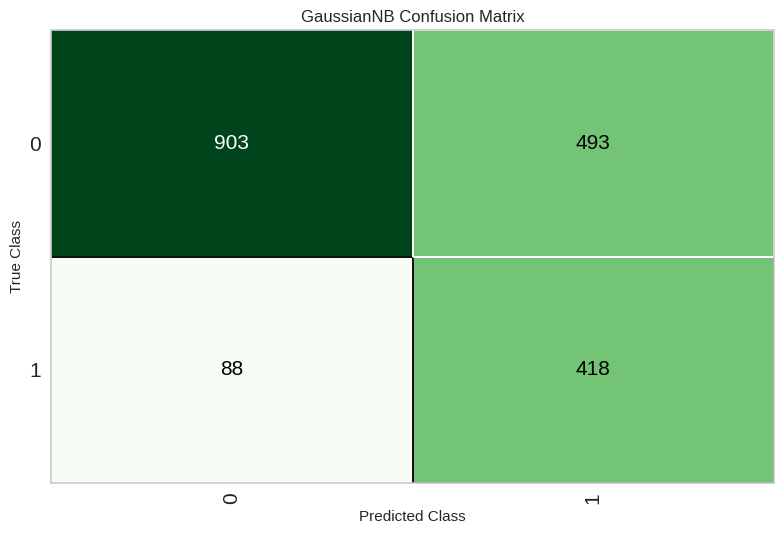

In [ ]:
# Plotar a matriz de confusão Nb
plot_model(tuned_nb, plot='confusion_matrix')

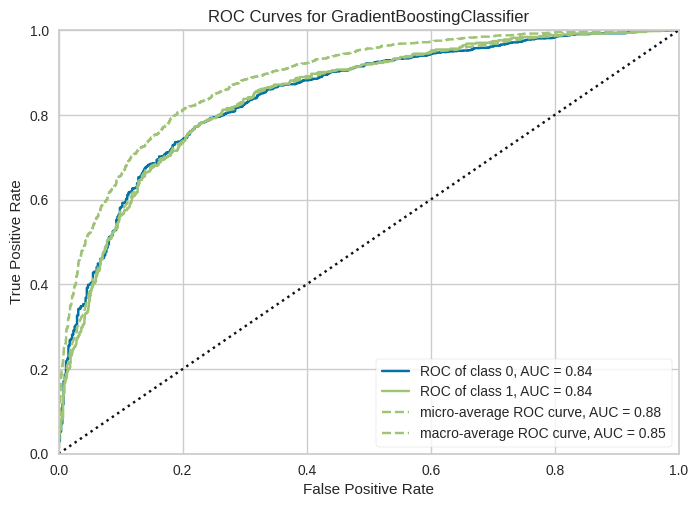

In [ ]:
# Plotar a curva Lr
plot_model(tuned_gbc, plot='auc')

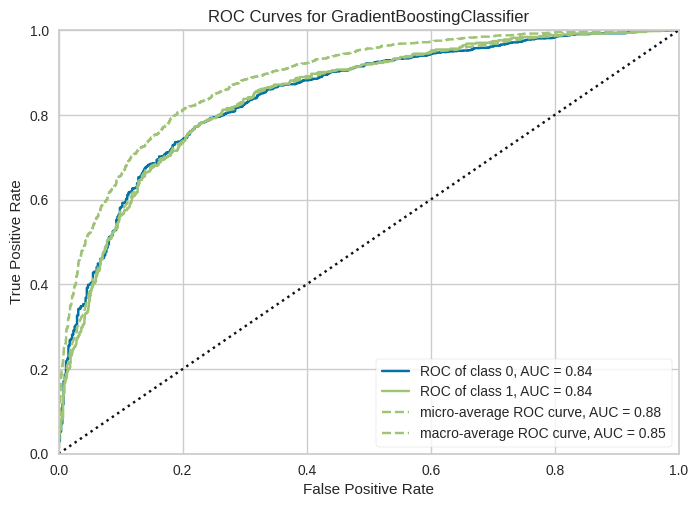

In [ ]:
# Plotar a curva Nb
plot_model(tuned_gbc, plot='auc')

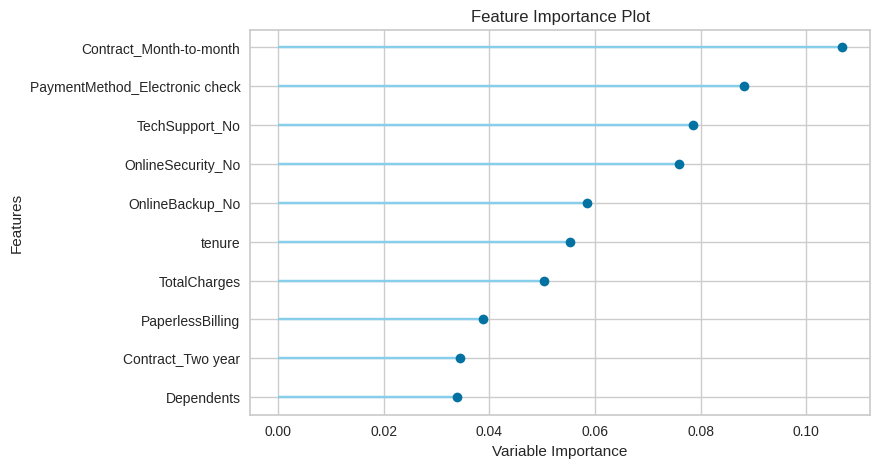

In [ ]:
# Plotar a importância das features Lr
plot_model(tuned_gbc, plot='feature')

Para modelos de Naive Bayes, a função `plot_model` do PyCaret não suporta diretamente a visualização da importância das features (`plot='feature'`). Isso ocorre porque o Naive Bayes não calcula a importância das features da mesma maneira que outros algoritmos de aprendizado de máquina como árvores de decisão ou florestas aleatórias.


### Fazendo Previsões

Antes de finalizar o modelo, é recomendável que se faça uma checagem final, fazendo previsões no conjunto de teste e revisando as métricas de avaliação.

O objetivo aqui é verificar a diferença de performance entre os resultados da validação cruzada e dos dados novos.

In [ ]:
# fazer previsões (Gbc)
predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8070,0.8446,0.6640,0.6304,0.6468,0.5142,0.5145


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_interval,Churn,prediction_label,prediction_score
4156,Male,0,No,No,5,Yes,Yes,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,92.500000,452.700012,0-12,1,1,0.7450
4398,Female,0,No,Yes,4,Yes,Yes,Fiber optic,No,Yes,...,No,Month-to-month,No,Bank transfer (automatic),84.050003,333.549988,0-12,1,1,0.5484
315,Male,0,No,No,5,Yes,No,Fiber optic,No,No,...,Yes,Month-to-month,No,Bank transfer (automatic),96.500000,492.549988,0-12,1,1,0.5952
3111,Female,0,Yes,Yes,2,Yes,No,No,No internet service,No internet service,...,No internet service,One year,No,Mailed check,20.299999,31.900000,0-12,0,0,0.8055
5797,Male,0,No,No,15,Yes,Yes,Fiber optic,Yes,No,...,No,Month-to-month,Yes,Bank transfer (automatic),87.750000,1242.199951,13-24,0,0,0.5193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4054,Female,1,Yes,No,11,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,99.550003,1131.199951,0-12,1,1,0.7466
3874,Female,0,No,No,1,Yes,No,Fiber optic,No,No,...,No,Month-to-month,No,Electronic check,79.550003,79.550003,0-12,1,1,0.7549
2366,Female,1,No,No,5,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,No,Credit card (automatic),59.900002,287.850006,0-12,0,0,0.6297
883,Female,1,Yes,No,33,Yes,Yes,Fiber optic,No,Yes,...,No,Month-to-month,Yes,Bank transfer (automatic),80.599998,2656.500000,25-36,1,0,0.5402


In [ ]:
# fazer previsões (Nb)
predict_model(tuned_nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6945,0.8190,0.8261,0.4588,0.5900,0.3768,0.4183


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_interval,Churn,prediction_label,prediction_score
4156,Male,0,No,No,5,Yes,Yes,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,92.500000,452.700012,0-12,1,1,1.0000
4398,Female,0,No,Yes,4,Yes,Yes,Fiber optic,No,Yes,...,No,Month-to-month,No,Bank transfer (automatic),84.050003,333.549988,0-12,1,1,1.0000
315,Male,0,No,No,5,Yes,No,Fiber optic,No,No,...,Yes,Month-to-month,No,Bank transfer (automatic),96.500000,492.549988,0-12,1,1,1.0000
3111,Female,0,Yes,Yes,2,Yes,No,No,No internet service,No internet service,...,No internet service,One year,No,Mailed check,20.299999,31.900000,0-12,0,0,1.0000
5797,Male,0,No,No,15,Yes,Yes,Fiber optic,Yes,No,...,No,Month-to-month,Yes,Bank transfer (automatic),87.750000,1242.199951,13-24,0,1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4054,Female,1,Yes,No,11,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,99.550003,1131.199951,0-12,1,1,1.0000
3874,Female,0,No,No,1,Yes,No,Fiber optic,No,No,...,No,Month-to-month,No,Electronic check,79.550003,79.550003,0-12,1,1,1.0000
2366,Female,1,No,No,5,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,No,Credit card (automatic),59.900002,287.850006,0-12,0,1,0.9735
883,Female,1,Yes,No,33,Yes,Yes,Fiber optic,No,Yes,...,No,Month-to-month,Yes,Bank transfer (automatic),80.599998,2656.500000,25-36,1,1,1.0000


* Entre os dois modelos, Naive Bayes e Gradient Boost Classifier, o modelo que apresenta um desempenho levemente superior seria o GBC

### Finalizando o Modelo

Finalizar o modelo é o último passo do nosso projeto. Um workflow normal no PyCaret começa com o setup(), seguido do compare_models() para encontrarmos os melhores candidatos baseado nas métricas de avaliação de interesse, para então darmos seguimento com tunig de parâmetros, ensembling, stacking, etc.

Esse workflow eventualmente irá levá-lo ao melhor modelo para fazer previsões em dados ainda não vistos. A função `finaliza_model()` dá o fit no modelo, incluindo o conjunto de teste separado dentro do PyCaret anteriormente (30% nesse caso).

O propósito disso é treinar o modelo no dataset completo antes de ser feito o deploy para produção.

In [ ]:
# finalizar modelo
final_gbc = finalize_model(gbc)

Após finalizado, podemos dar print no objeto do modelo para verificar os parâmetros utilizados para os melhores resultados.

In [ ]:
# parâmetros finais para deploy
print(final_gbc)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['SeniorCitizen', 'tenure',
                                             'MonthlyCharges', 'TotalCharges'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, lo

### Prevendo em Dados Novos

A função `predict_model()` também é usada para prever em datasets nunca vistos antes. A única diferença é que para isso passaremos o parâmetro data.

Dessa forma, passaremos como data os dados que ainda não foram vistos pelo modelo, separados anteriormente, no começo do projeto.

Esse conjunto contém 10% do conjunto de dados original. Essa porção nunca foi exposta ao PyCaret, e é perfeita para simular novos dados reais que serão recebidos pelo modelo em produção.

In [ ]:
# previsão em dados não vistos
unseen_predictions = predict_model(final_gbc, data=test)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7955,0.8535,0.5628,0.6168,0.5886,0.4528,0.4537


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_interval,Churn,prediction_label,prediction_score
0,Female,1,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,Month-to-month,Yes,Electronic check,19.450001,19.450001,0-12,1,0,0.5471
1,Female,1,No,No,32,Yes,No,Fiber optic,No,Yes,...,No,Month-to-month,Yes,Electronic check,74.400002,2276.949951,25-36,1,1,0.5458
2,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,...,Yes,Two year,No,Credit card (automatic),92.300003,6719.899902,61-72,0,0,0.9770
3,Male,0,No,No,5,No,No phone service,DSL,No,Yes,...,Yes,Month-to-month,Yes,Mailed check,51.000000,305.950012,0-12,1,1,0.5255
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,0-12,1,1,0.7642


A coluna label é adicionada ao conjunto novo. O Label é o valor previsto pelo modelo GBC.

### Salvando o Modelo

Agora que terminamos nosso trabalho com o modelo, é hora de se preocupar em como mantê-lo utilizável e pronto para fazer novas previsões em novos dados.

Com a função `save_model()` nós conseguimos salvar o nosso modelo treinado, pronto para uso. Dentro dele também está contido todo o pipeline de pré-processamento que foi utilizado. Basta passar o conjunto de dados para fazer as previsões.

In [ ]:
# salvando o modelo
save_model(final_gbc,'Modelo_Final_10_06_24')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SeniorCitizen', 'tenure',
                                              'MonthlyCharges', 'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude...
                                             criterion='friedman_mse', init=None,
                                             learni

Uma vez carregado, você pode simplesmente usá-lo em um novo conjunto de dados utilizando a função `predict_model()`. Os passos possíveis são os mesmo que mostramos anteriormente, desde o treino do modelo.

### Carregando um Modelo Salvo

Para carregar um modelo salvo para uso em dados novos, basta usar a função `load_model()` e então aplicar o modelo salvo em novos dados para uma nova previsão.

In [ ]:
# carregando um modelo salvo
saved_final_gbc = load_model('Modelo_Final_10_06_24')

Transformation Pipeline and Model Successfully Loaded


Uma vez carregado, você pode simplesmente usá-lo em um novo conjunto de dados utilizando a função predict_model(). Os passos possíveis são os mesmo que mostramos anteriormente, desde o treino do modelo.

In [ ]:
# fazendo previsões com o modelo salvo
#new_prediction = predict_model(saved_final_gbc, data=test)
#new_prediction.head()

In [ ]:
#dump(final_gbc, 'Modelo_Final_10_06_24.joblib')

FileNotFoundError: [Errno 2] No such file or directory: 'model/Modelo_Final_10_06_24.joblib'

## Conclusão


Neste projeto de previsão de churn, nosso objetivo foi criar um modelo de aprendizado de máquina para prever se um cliente vai cancelar sua assinatura (churn) com base em dados como senioridade, gastos mensais, tipo de serviço, entre outros.

* Resultados:

  1. **Modelo Utilizado**:
   - **Gradient Boosting Classifier**: Ofereceu alta precisão e identificou padrões complexos nos dados.
   
  2. **Métrica Principal**: Utilizamos o recall como métrica principal, pois é crucial identificar todos os clientes que estão em risco de churn, mesmo que isso resulte em alguns falsos positivos.

* Insights:
  - **O gênero não parece interferir em probabilidade de Churn, porém a senioridade sim, nesse caso, quem não é da senioridade possui uma probabilidade maior de Churn**.

  - **Clientes com maior tempo de assinatura (tenure) tendem a ter menor chance de churn**.
  
  - **Clientes com contratos do tipo mês-a-mês tendem a churnarem.**.

  - **Clientes com tipo de pagamento e-check possuem a probabilidade maior de Churn**.

**Conclusão**

O modelo de churn prediction nos forneceu uma ferramenta poderosa para identificar e agir sobre os clientes em risco de cancelamento, ajudando a empresa a melhorar a retenção de clientes e a reduzir perdas de receita.